# EDA and Feature Engineering on Google Play Store 

**1) Problem statement.**
 
Today, 1.85 million different apps are available for users to download. Android users have even more from which to choose, with 2.56 million available through the Google Play Store. 

These apps have come to play a huge role in the way we live our lives today. 

Our Objective is to find the Most Popular Category, find the App with largest number of installs , the App with largest size etc.

**2) Data Collection.**

The data consists of 20 columns and 10841 rows.

## Steps to be followed:
1. Data Cleaning
2. Exploratory Data Analysis (EDA)
3. Feature Engineering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [4]:
df.shape

(10841, 13)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,9367.0,4.193338,0.537431,1.0,4.0,4.3,4.5,19.0


In [6]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [7]:
df.Reviews.unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'],
      shape=(6002,), dtype=object)

In [8]:
df['Reviews'].str.isnumeric().sum()

np.int64(10840)

In [9]:
df[~df['Reviews'].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


### Data Cleaning

In [10]:
df_copy = df.copy()

In [11]:
df_copy.drop(df_copy.index[10472], inplace=True)
df_copy[~df_copy['Reviews'].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [12]:
# Convert 'Reviews' column to integer type

df_copy['Reviews'] = df_copy['Reviews'].astype(int)
df_copy['Reviews'].dtype

dtype('int64')

In [13]:
df_copy['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [14]:
# Clean the Size column

df_copy['Size'] = df_copy['Size'].str.replace('M', '000')
df_copy['Size'] = df_copy['Size'].str.replace('m', '000')
df_copy['Size'] = df_copy['Size'].str.replace('K', '')
df_copy['Size'] = df_copy['Size'].str.replace('k', '')
df_copy['Size'] = df_copy['Size'].replace('Varies with device', np.nan)
df_copy['Size'] = df_copy['Size'].str.replace('.', '', regex=False)

In [16]:
df_copy['Size'] = df_copy['Size'].astype(float) # Convert the Size column to float type
df_copy['Size'].dtype 

dtype('float64')

In [17]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.2+ MB


In [18]:
df_copy['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [19]:
df_copy['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [20]:
# Remove the special chars

chars_to_remove = ['+', ',', '$']
cols_to_clean = ['Installs', 'Price']
for char in chars_to_remove:
    for col in cols_to_clean:
        df_copy[col] = df_copy[col].str.replace(char, '')

In [21]:
df_copy['Installs']=df_copy['Installs'].astype('int')
df_copy['Price']=df_copy['Price'].astype('float')

In [22]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  int64  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1.2+ MB


In [23]:
df_copy['Last Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      shape=(1377,), dtype=object)

In [24]:
# Get the useful informations from Last Updated column

df_copy['Last Updated'] = pd.to_datetime(df_copy['Last Updated'])
df_copy['Day'] = df_copy['Last Updated'].dt.day
df_copy['Month'] = df_copy['Last Updated'].dt.month
df_copy['Year'] = df_copy['Last Updated'].dt.year
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10840 non-null  object        
 1   Category        10840 non-null  object        
 2   Rating          9366 non-null   float64       
 3   Reviews         10840 non-null  int64         
 4   Size            9145 non-null   float64       
 5   Installs        10840 non-null  int64         
 6   Type            10839 non-null  object        
 7   Price           10840 non-null  float64       
 8   Content Rating  10840 non-null  object        
 9   Genres          10840 non-null  object        
 10  Last Updated    10840 non-null  datetime64[ns]
 11  Current Ver     10832 non-null  object        
 12  Android Ver     10838 non-null  object        
 13  Day             10840 non-null  int32         
 14  Month           10840 non-null  int32         
 15  Year   

In [25]:
df_copy.drop('Last Updated', axis=1, inplace=True)
df_copy.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,87000.0,5000000,Free,0.0,Everyone,Art & Design,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,28000.0,100000,Free,0.0,Everyone,Art & Design;Creativity,1.1,4.4 and up,20,6,2018


In [26]:
df_copy.to_csv('data/googleplaystore_cleaned.csv', index=False)

# EDA and Feature Engineering

In [2]:
df = pd.read_csv('data/googleplaystore_cleaned.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,87000.0,5000000,Free,0.0,Everyone,Art & Design,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,28000.0,100000,Free,0.0,Everyone,Art & Design;Creativity,1.1,4.4 and up,20,6,2018


In [6]:
# Check for duplicates

df[df['App'].duplicated()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Day,Month,Year
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,NaN,5000000,Free,0.0,Everyone,Business,Varies with device,4.0.3 and up,26,2,2018
236,Box,BUSINESS,4.2,159872,NaN,10000000,Free,0.0,Everyone,Business,Varies with device,Varies with device,31,7,2018
239,Google My Business,BUSINESS,4.4,70991,NaN,5000000,Free,0.0,Everyone,Business,2.19.0.204537701,4.4 and up,24,7,2018
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37000.0,10000000,Free,0.0,Everyone,Business,4.1.28165.0716,4.0 and up,20,7,2018
261,join.me - Simple Meetings,BUSINESS,4.0,6989,NaN,1000000,Free,0.0,Everyone,Business,4.3.0.508,4.4 and up,16,7,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10714,FarmersOnly Dating,DATING,3.0,1145,14000.0,100000,Free,0.0,Mature 17+,Dating,2.2,4.0 and up,25,2,2016
10719,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981,40000.0,1000000,Free,0.0,Everyone,Communication,5.2,5.0 and up,6,7,2018
10729,FP Notebook,MEDICAL,4.5,410,60000.0,50000,Free,0.0,Everyone,Medical,2.1.0.372,4.4 and up,24,3,2018
10752,Slickdeals: Coupons & Shopping,SHOPPING,4.5,33599,12000.0,1000000,Free,0.0,Everyone,Shopping,3.9,4.4 and up,30,7,2018


In [5]:
df[df['App'].duplicated()].shape

(1181, 15)

In [7]:
## Remove duplicates value keeping the first one
df.drop_duplicates(subset=['App'], keep='first', inplace=True)
df.shape

(9659, 15)

In [8]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']  

print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('We have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 8 numerical features : ['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Day', 'Month', 'Year']
We have 7 categorical features : ['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver']


**Feature Information**

1. **App:** - Name of the App
2. **Category:** - Category under which the App falls.
3. **Rating:** - Application's rating on playstore
4. **Reviews:** - Number of reviews of the App.
5. **Size:** - Size of the App.
6. **Install:** - Number of Installs of the App
7. **Type:** - If the App is free/paid
8. **Price:** - Price of the app (0 if it is Free)
9. **Content Rating:** - Appropiate Target Audience of the App.
10. **Genres:** - Genre under which the App falls.
11. **Last Updated:** - Date when the App was last updated
12. **Current Ver:** - Current Version of the Application
13. **Android Ver:** - Minimum Android Version required to run the App

In [11]:
for col in categorical_features:
    print(df[col].value_counts(normalize=True) * 100)
    print('--------------------------------')

App
Photo Editor & Candy Camera & Grid & ScrapBook    0.010353
Tic Tac CK                                        0.010353
INFAMY RO                                         0.010353
CK Call NEW                                       0.010353
Ck Coif                                           0.010353
                                                    ...   
Bike Race Free - Top Motorcycle Racing Games      0.010353
Dance School Stories - Dance Dreams Come True     0.010353
3D Bowling                                        0.010353
Mind Games Pro                                    0.010353
iHoroscope - 2018 Daily Horoscope & Astrology     0.010353
Name: proportion, Length: 9659, dtype: float64
--------------------------------
Category
FAMILY                 18.966767
GAME                    9.928564
TOOLS                   8.561963
BUSINESS                4.348276
MEDICAL                 4.089450
PERSONALIZATION         3.892743
PRODUCTIVITY            3.872036
LIFESTYLE               3.8

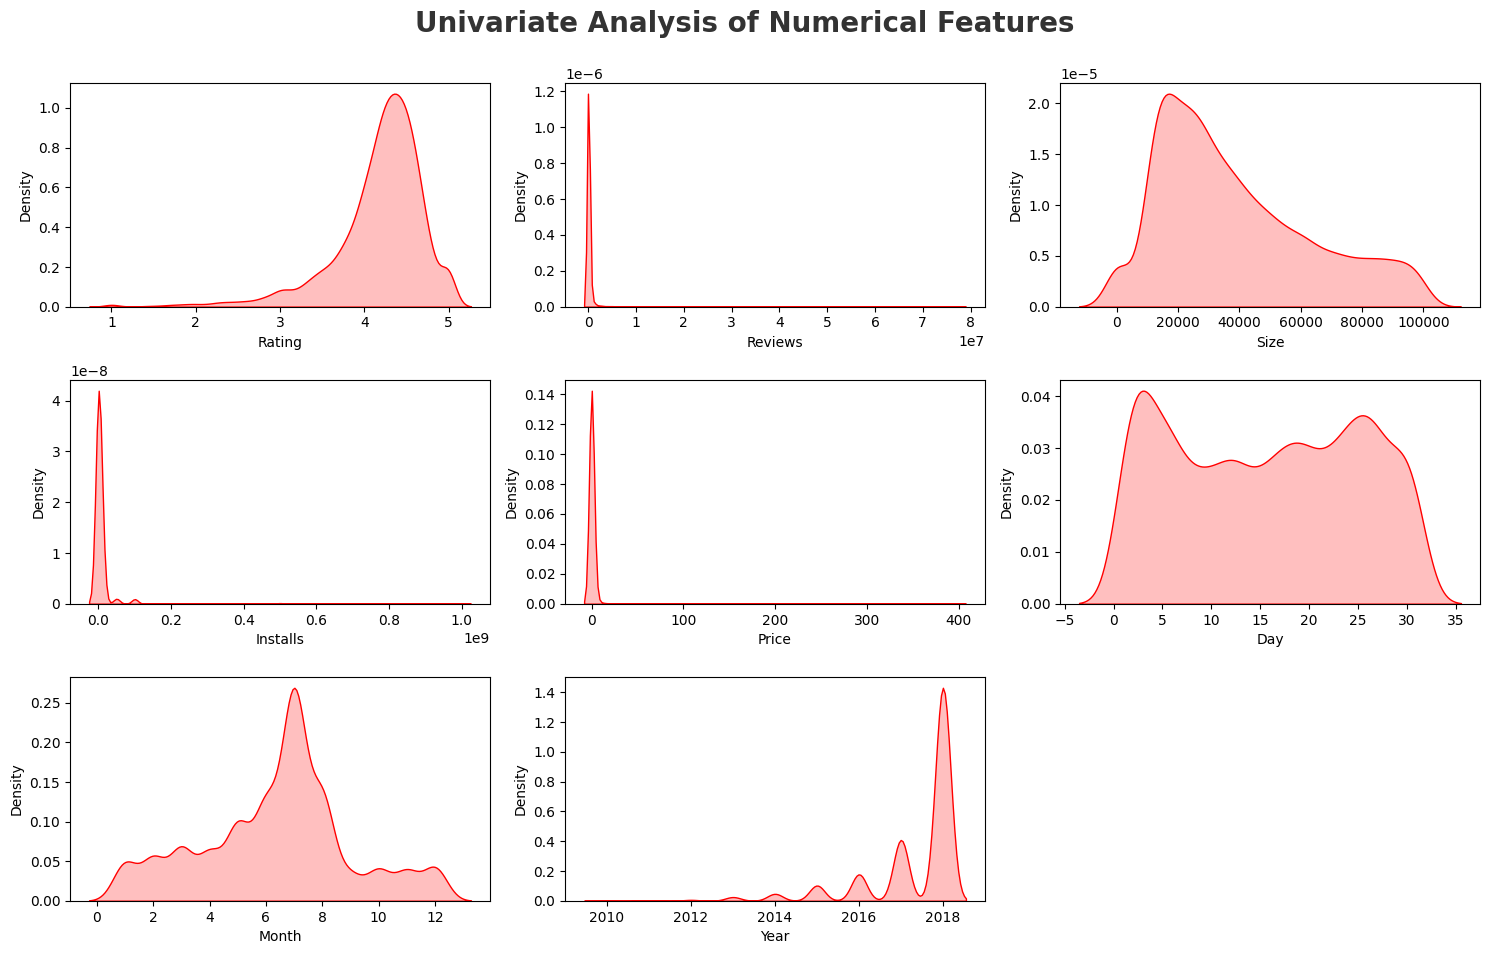

In [13]:
## Proportion of count data on numerical columns
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[numeric_features[i]],shade=True, color='r')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

### Observations about numerical columns
1. Most of the apps have rating between 4 and 5.
2. Most of the apps have reviews less than 100000.
3. Most of the apps have size less than 100000 KB.
4. Most of the apps have installs less than 1000000.
5. Most of the apps are free.
6. Most of the apps have last updated year between 2016 and 2019.

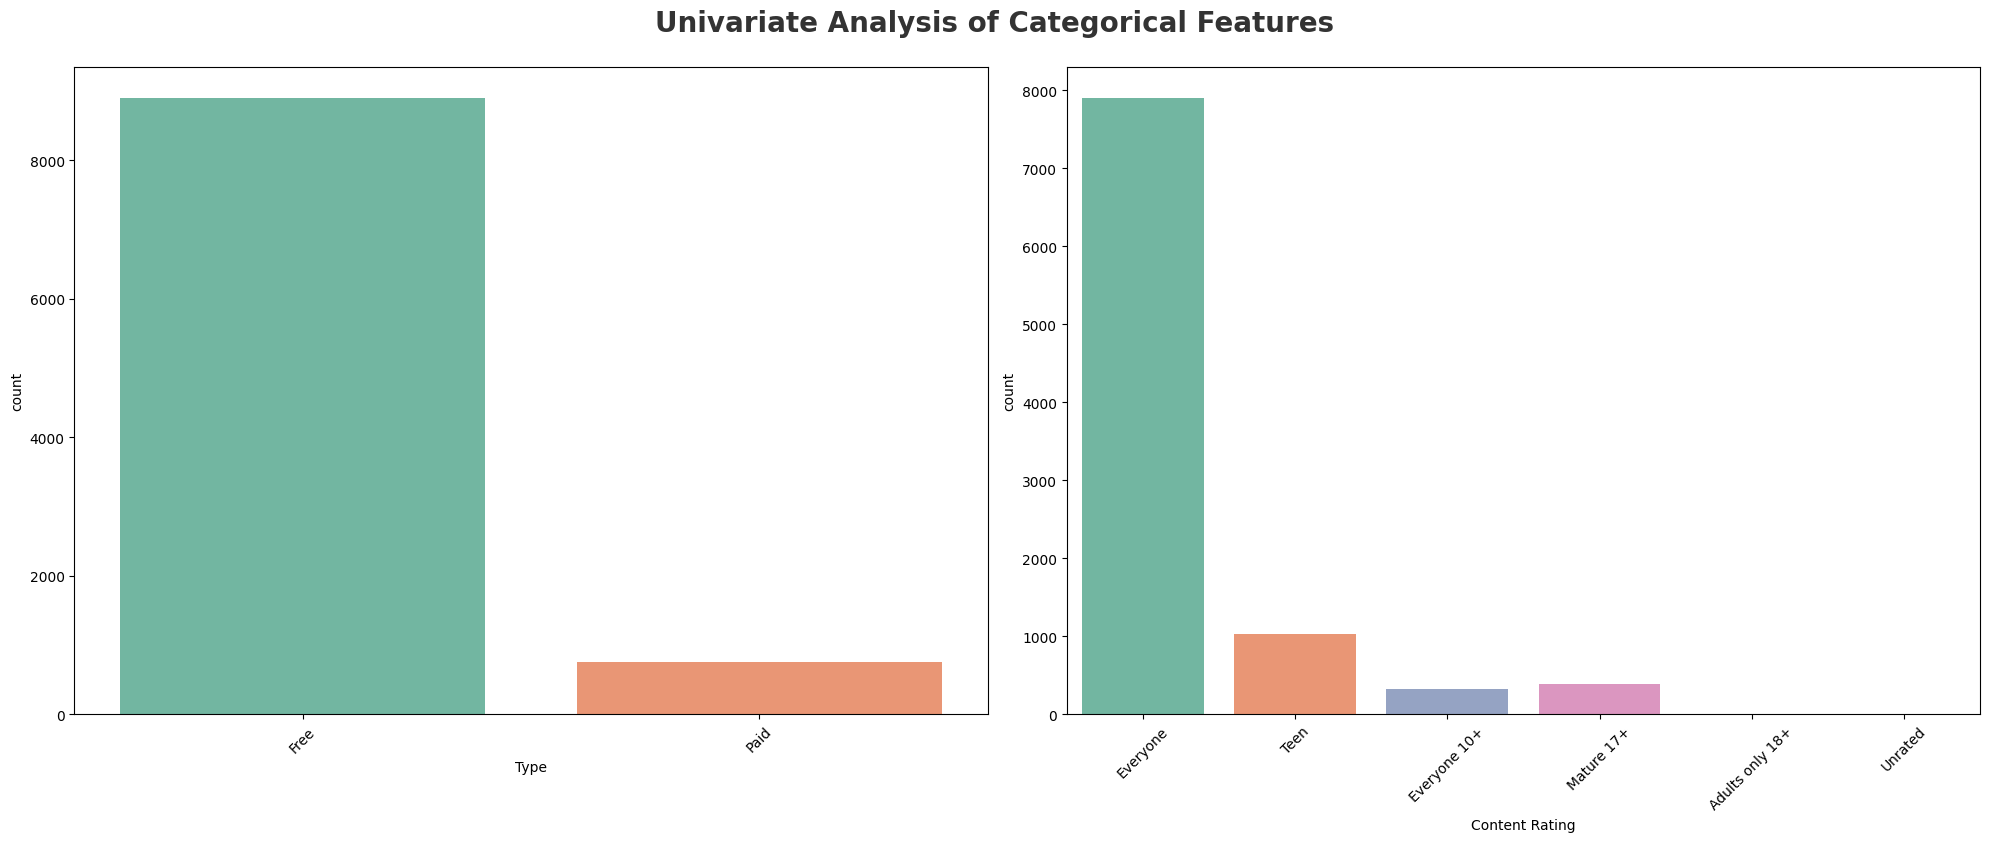

In [15]:
# categorical columns
plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
category = [ 'Type', 'Content Rating']
for i in range(0, len(category)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=df[category[i]],palette="Set2")
    plt.xlabel(category[i])
    plt.xticks(rotation=45)
    plt.tight_layout() 

### Observations about categorical columns
1. Most of the apps are free.
2. Most of the apps have a content rating of "Everyone"

### Which category has the most number of apps?

In [17]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,87000.0,5000000,Free,0.0,Everyone,Art & Design,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,28000.0,100000,Free,0.0,Everyone,Art & Design;Creativity,1.1,4.4 and up,20,6,2018


Text(0, 0.5, '')

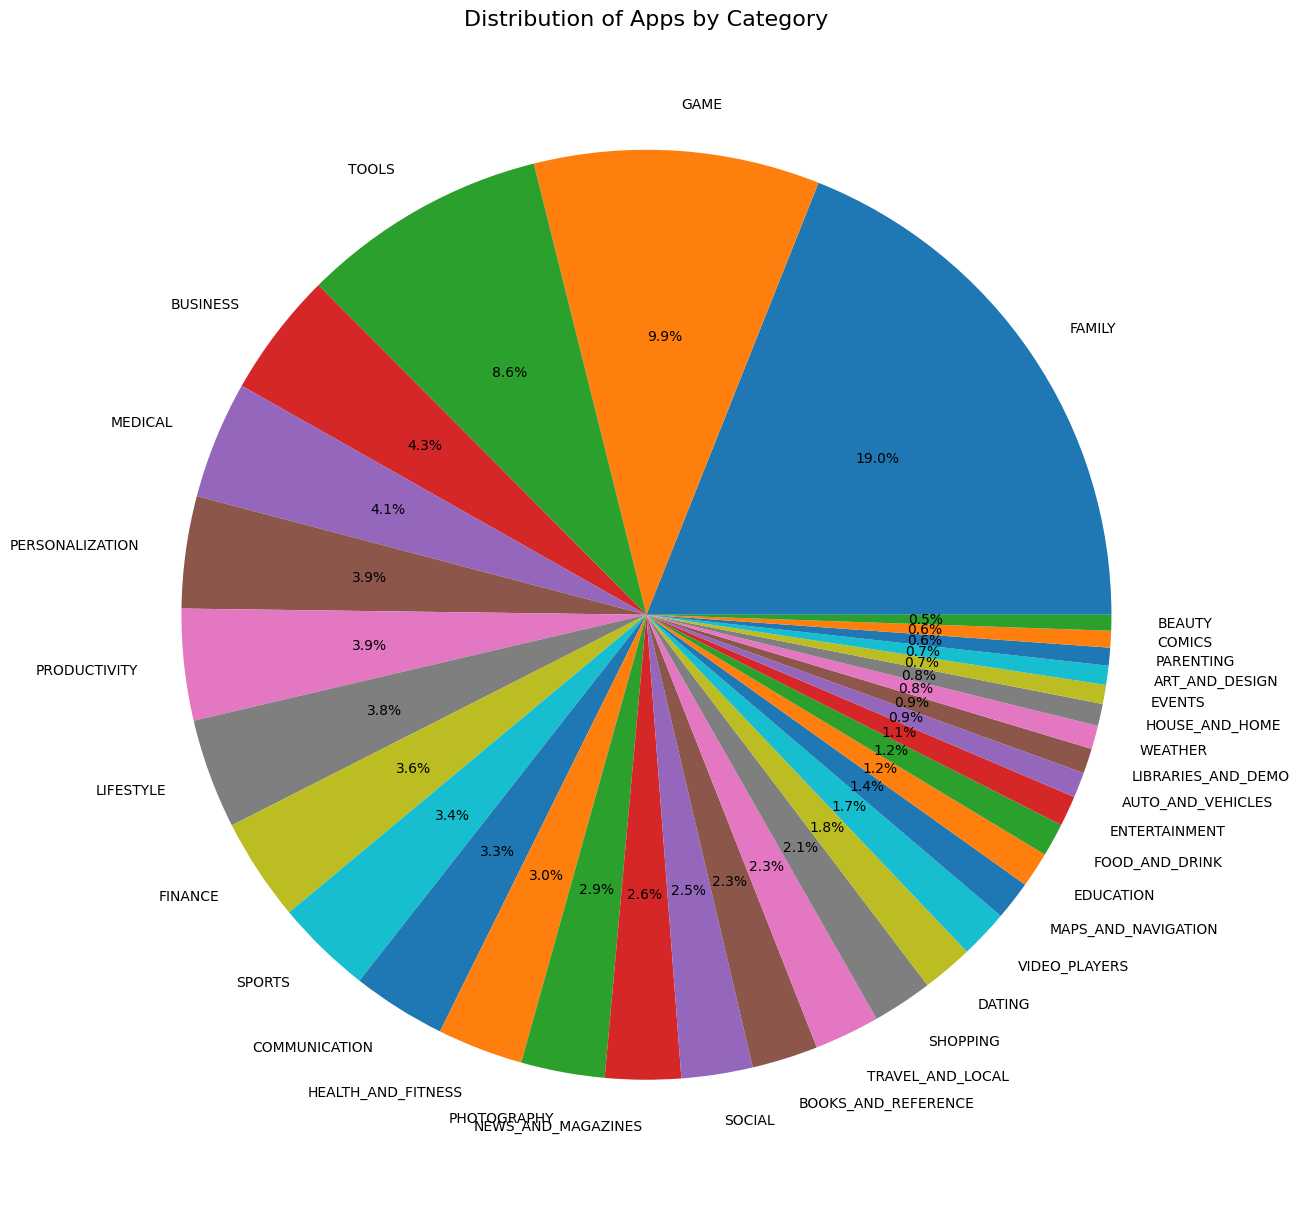

In [ ]:
df['Category'].value_counts().plot.pie(y = 'Category', autopct='%1.1f%%', figsize=(15, 18))
plt.title('Distribution of Apps by Category', fontsize=16)
plt.ylabel('')

### Observations:
1. FAMILY category has the most number of apps.
2. FAMILY, GAME and TOOLS categories have more than 1000 apps.
3. There are some categories like BEAUTY, COMICS, DATING which have less than 100 apps.

### Top 10 App Categories

In [23]:
category = pd.DataFrame(df['Category'].value_counts())
category.rename(columns = {'Category':'Count'},inplace=True)
category

,count
Category,
FAMILY,1832
GAME,959
TOOLS,827
BUSINESS,420
MEDICAL,395
PERSONALIZATION,376
PRODUCTIVITY,374
LIFESTYLE,369
FINANCE,345


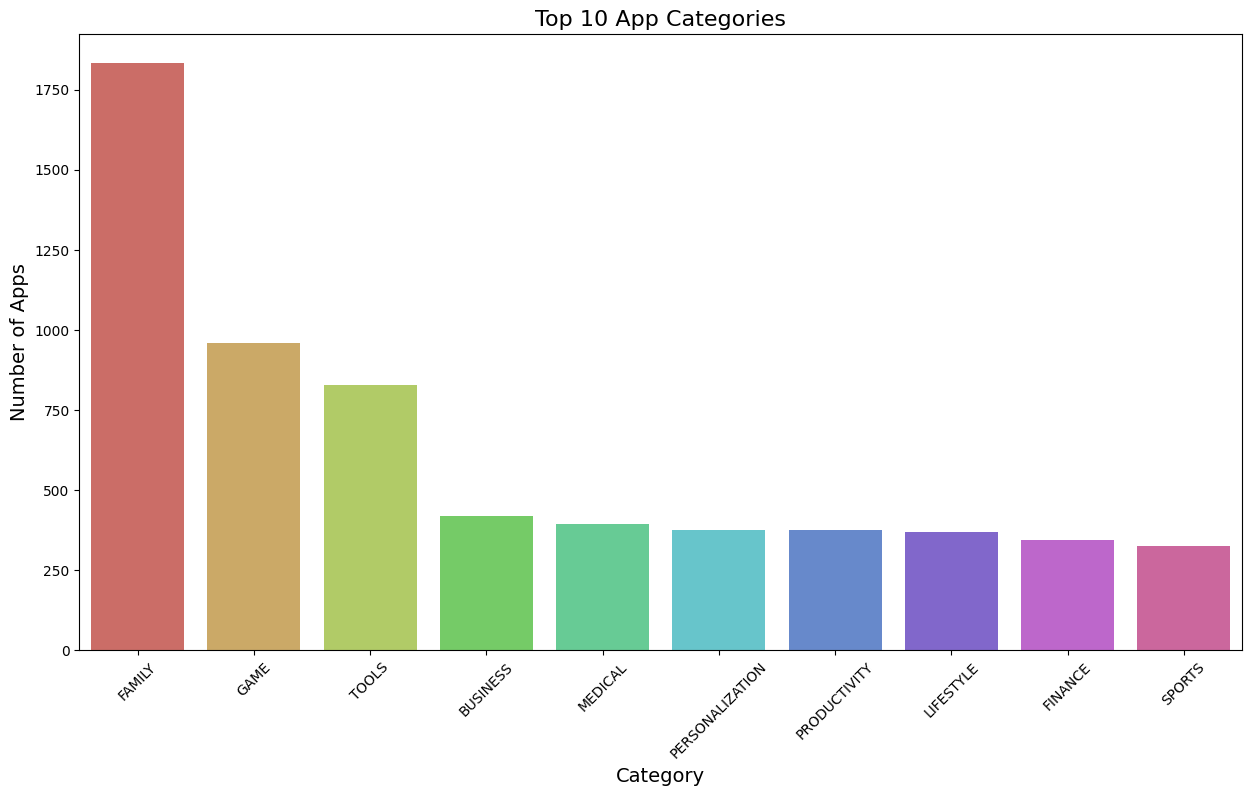

In [26]:
plt.figure(figsize=(15, 8))
sns.barplot(x=category.index[:10], y=category['count'][:10], palette='hls')
plt.title('Top 10 App Categories', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Number of Apps', fontsize=14)
plt.xticks(rotation=45)
plt.show()

### Insights
1. Family category has the most number of apps with 18% of apps belonging to it, followed by Games category which has 11% of the apps.
2. Least number of apps belong to the Beauty category with less than 1% of the total apps belonging to it.

### Which Category has largest number of installations?

In [28]:
cat_install = df.groupby('Category')['Installs'].sum().sort_values(ascending=False).reset_index()
cat_install.Installs = cat_install.Installs/1000000000 # Convert to billions
cat_install.head(10)

,Category,Installs
0,GAME,13.878924
1,COMMUNICATION,11.038276
2,TOOLS,8.001772
3,PRODUCTIVITY,5.793091
4,SOCIAL,5.487868
5,PHOTOGRAPHY,4.649148
6,FAMILY,4.427942
7,VIDEO_PLAYERS,3.926903
8,TRAVEL_AND_LOCAL,2.894887
9,NEWS_AND_MAGAZINES,2.369218


Text(0.5, 1.0, 'Most Popular Categories in Play Store')

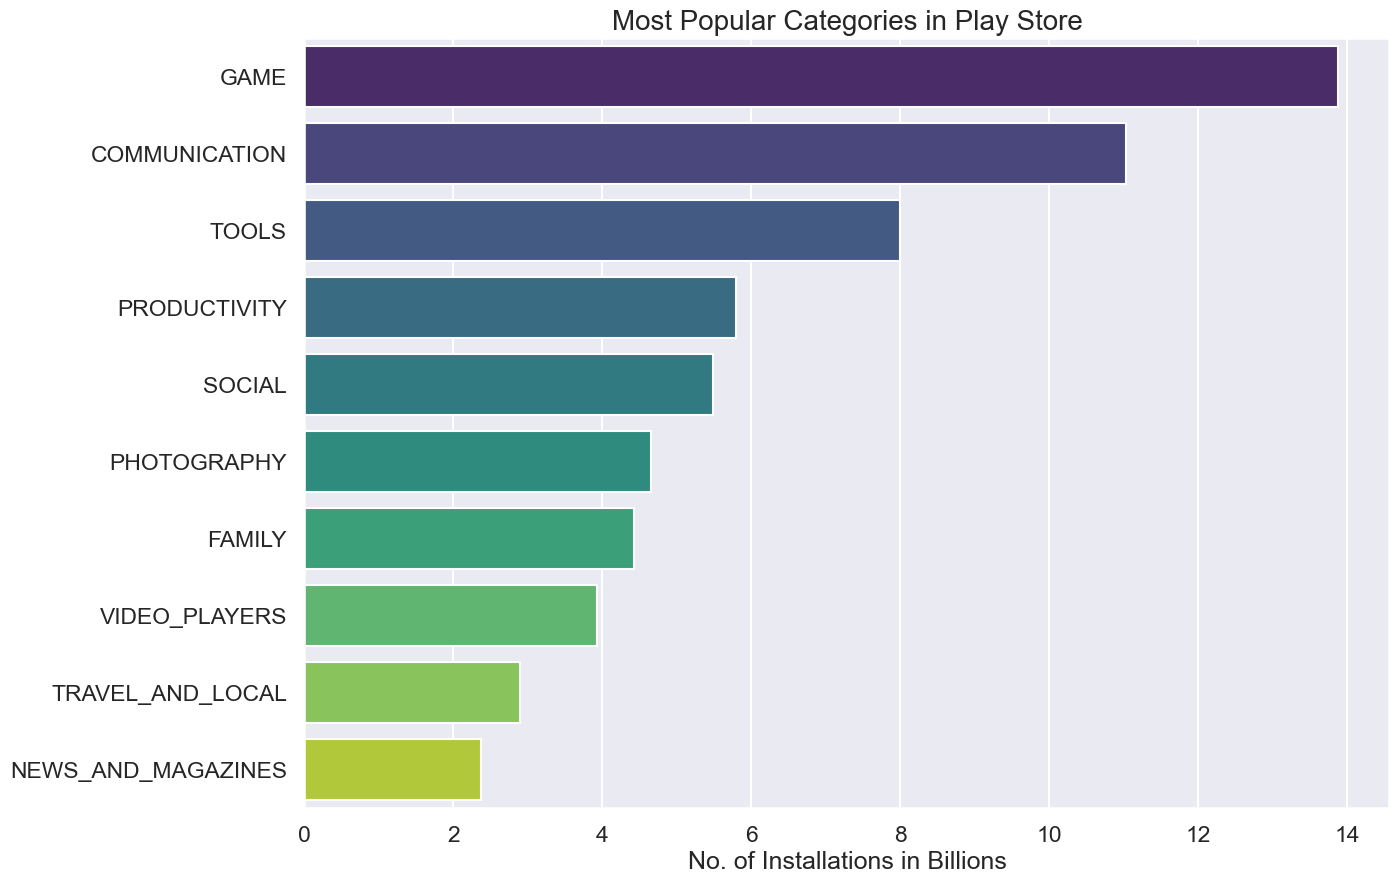

In [31]:
plt.figure(figsize = (14,10))
sns.set_context("talk")
sns.set_style("darkgrid")

ax = sns.barplot(x = 'Installs' , y = 'Category' , data = cat_install[:10], palette='viridis')
ax.set_xlabel('No. of Installations in Billions')
ax.set_ylabel('')
ax.set_title("Most Popular Categories in Play Store", size = 20)

### Insights
1. Out of all the categories `GAME` has the most number of Installations.
2. With almost 14 Billion Installations `GAME` is the most popular Category in Google App store

### What are the Top 5 most installed Apps in each popular categories?

In [32]:
top_apps = df.loc[df['Category'].isin(cat_install['Category'][:5]), ['Category', 'App', 'Installs']]
top_apps = top_apps.sort_values(['Category', 'Installs'], ascending=[True, False])
top_apps = top_apps.groupby('Category').head(5).reset_index(drop=True)
top_apps['Installs'] = top_apps['Installs'] / 1000000000
top_apps

,Category,App,Installs
0,COMMUNICATION,Messenger – Text and Video Chat for Free,1.0
1,COMMUNICATION,WhatsApp Messenger,1.0
2,COMMUNICATION,Google Chrome: Fast & Secure,1.0
3,COMMUNICATION,Gmail,1.0
4,COMMUNICATION,Hangouts,1.0
5,GAME,Subway Surfers,1.0
6,GAME,Candy Crush Saga,0.5
7,GAME,Temple Run 2,0.5
8,GAME,Pou,0.5
9,GAME,My Talking Tom,0.5


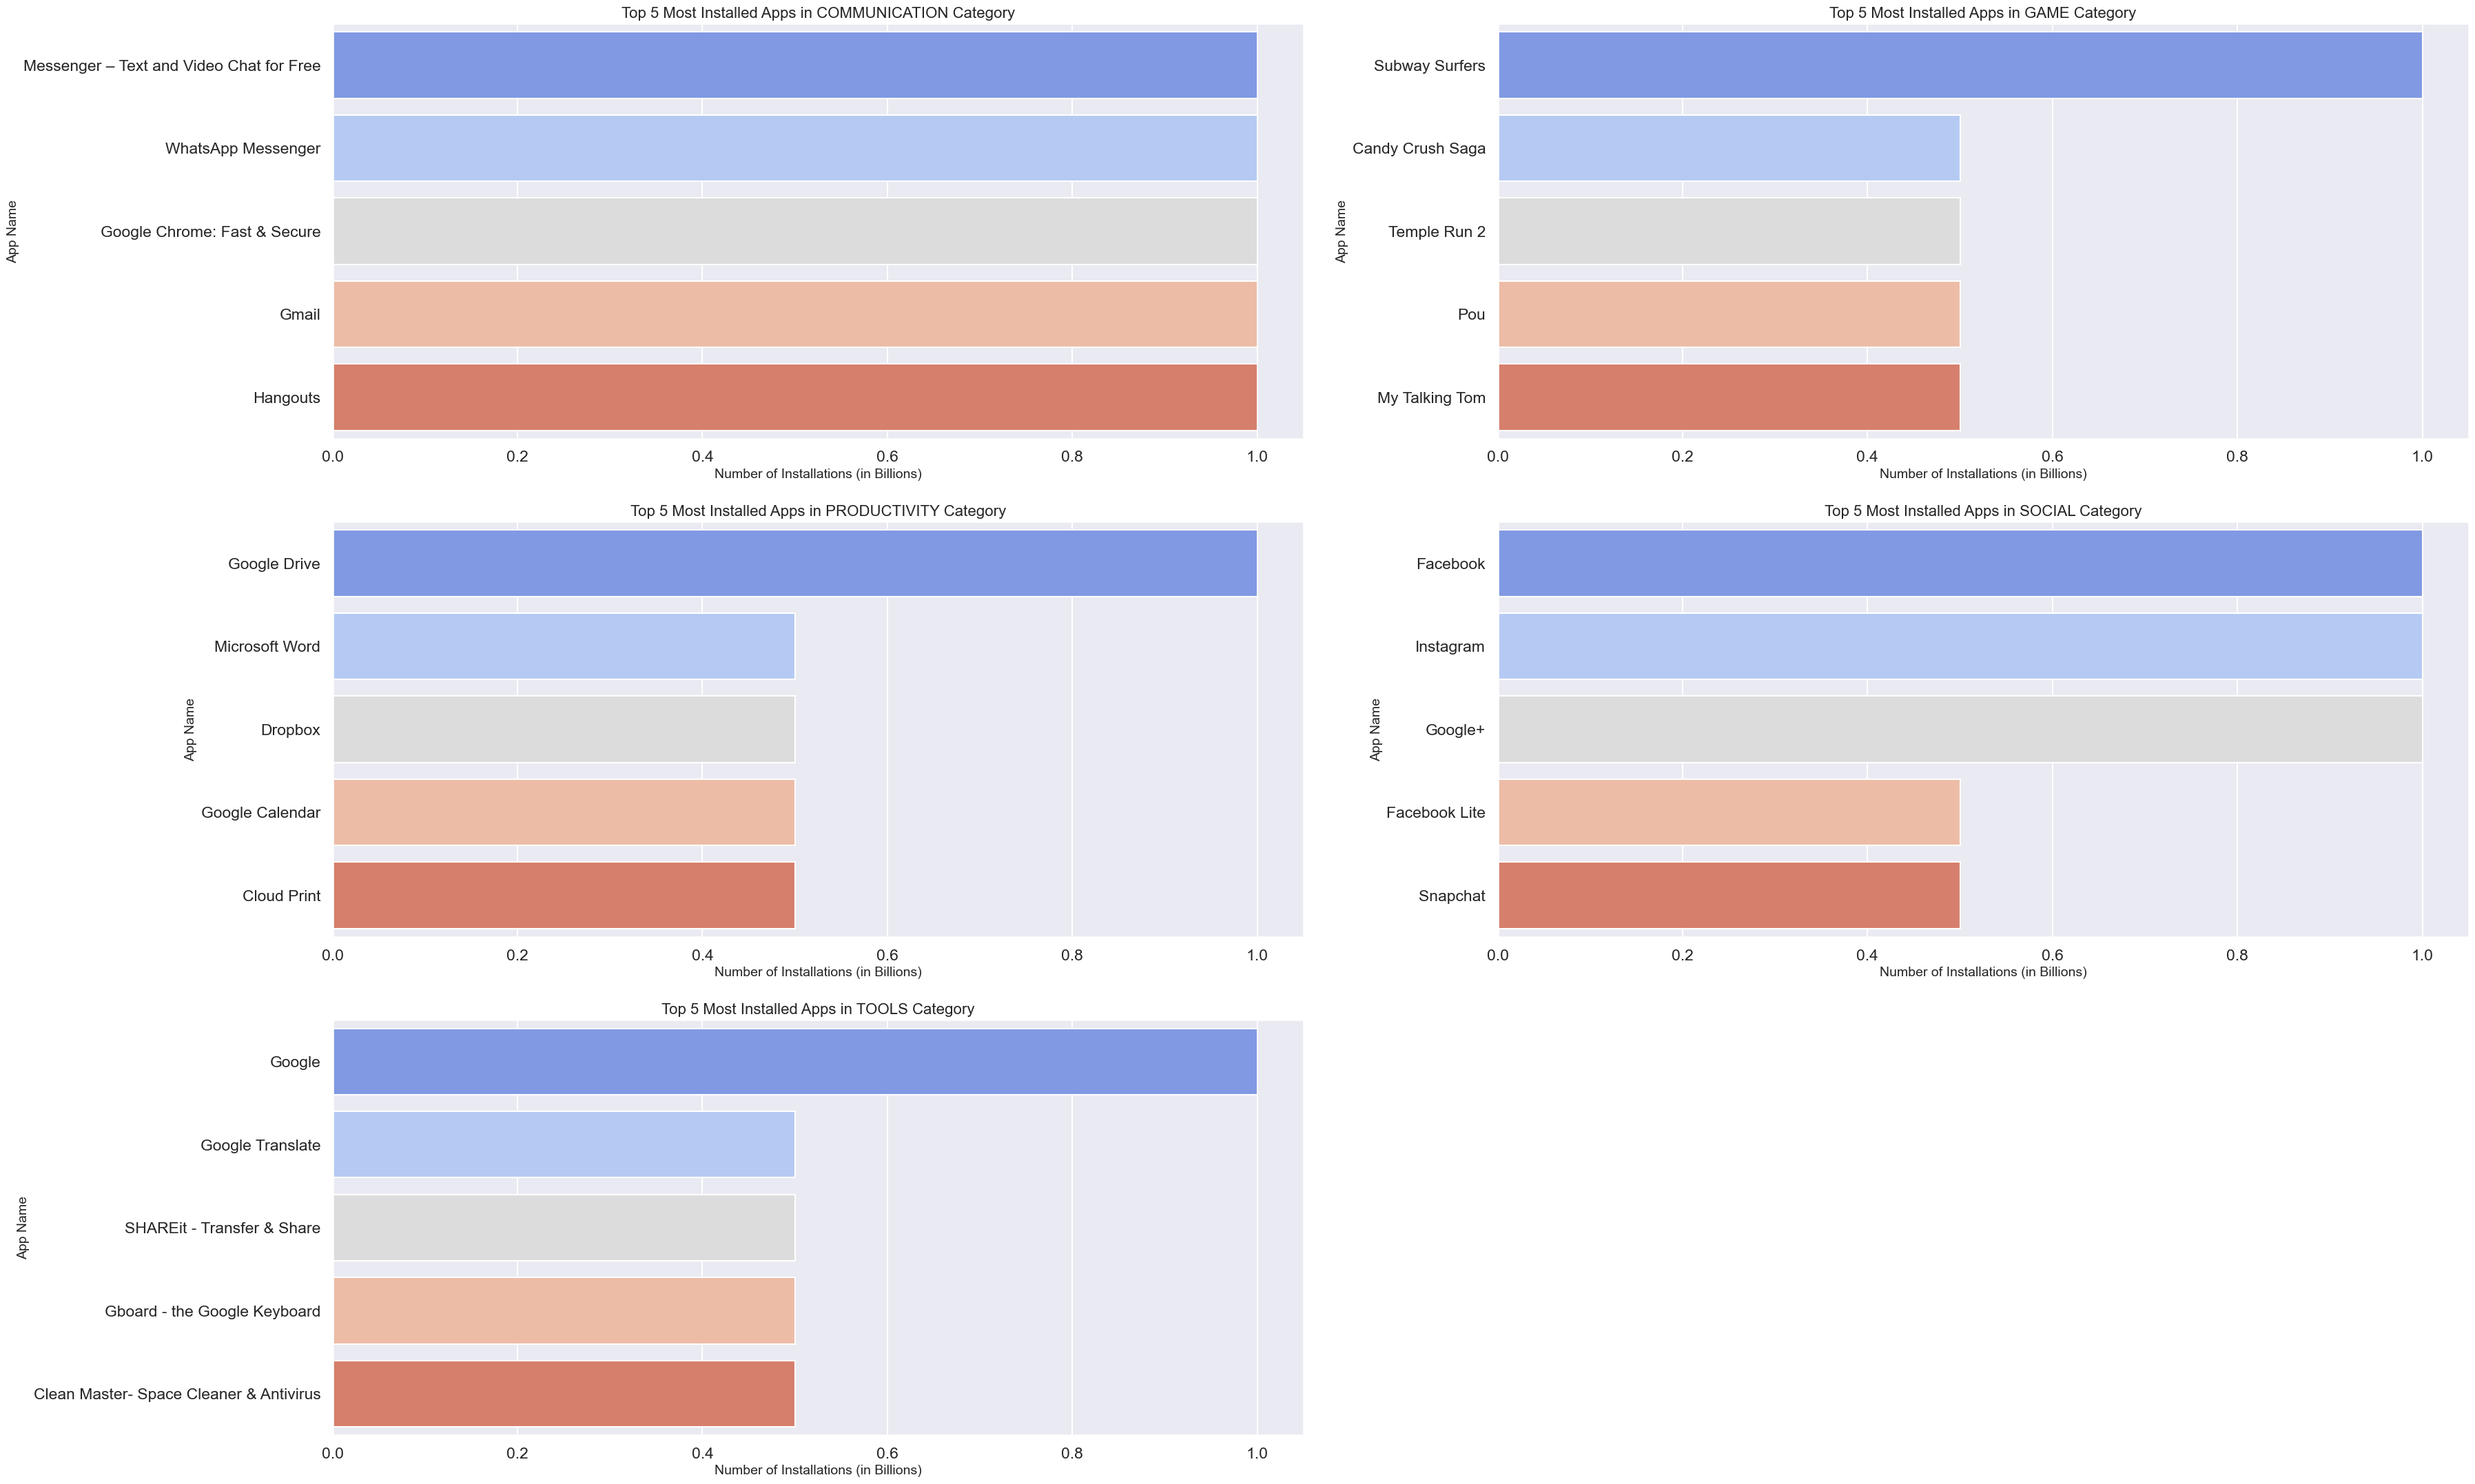

In [36]:
plt.figure(figsize=(40, 36))
for i, category in enumerate(top_apps['Category'].unique()):

    subset = top_apps[top_apps['Category'] == category]
    plt.subplot(4, 2, i+1)
    sns.barplot(x='Installs', y='App', data=subset, palette='coolwarm')
    plt.title(f'Top 5 Most Installed Apps in {category} Category', fontsize=16)
    plt.xlabel('Number of Installations (in Billions)', fontsize=14)
    plt.ylabel('App Name', fontsize=14)

### Insights
- Most popular game is Subway Surfers.
- Most popular communication app is Hangouts.
- Most popular productivity app is Google Drive.
- Most popular social app is Instagram.

### How many apps are there on Google Play Store which get 5 ratings?

In [39]:
rating = df.groupby(['Category', 'Installs', 'App'])['Rating'].sum().sort_values(ascending=False).reset_index()
top_rating_apps = rating[rating['Rating'] == 5.0]
print("Number of 5 rated apps",top_rating_apps.shape[0])
top_rating_apps.head(10)

Number of 5 rated apps 271


,Category,Installs,App,Rating
0,FAMILY,1000,CS & IT Interview Questions,5.0
1,DATING,100,Online Girls Chat Group,5.0
2,FAMILY,10,Chronolink DX,5.0
3,DATING,500,Spine- The dating app,5.0
4,MEDICAL,5,Clinic Doctor EHr,5.0
5,MEDICAL,5,Anatomy & Physiology Vocabulary Exam Review App,5.0
6,MEDICAL,1,KBA-EZ Health Guide,5.0
7,FAMILY,10,DN Employee,5.0
8,FAMILY,1000,Safe Santa Fe,5.0
9,DATING,100,Speeding Joyride & Car Meet App,5.0


In [40]:
top_rating_apps.head(1)

,Category,Installs,App,Rating
0,FAMILY,1000,CS & IT Interview Questions,5.0


### Insights
- There are 271 five rated apps on Google Play store
- Top most is 'CS & IT Interview Questions' from 'Family' Category